## Challenge: What to use

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

- Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
- Did people become happier from 2012 to 2014? Compute results for each country in the sample.
- Who reported watching more TV in 2012, men or women?
- Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
- Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there - differences, and if so, which countries stand out?
- Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.stats.weightstats import ztest

%matplotlib inline

In [3]:
survey = pd.read_csv('ESSdata_Thinkful.csv')

survey.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

CH
T-test=0.0, p-value=0.5
In CH, people become equal or greater from 2012 to 2014 (fail to reject H0)


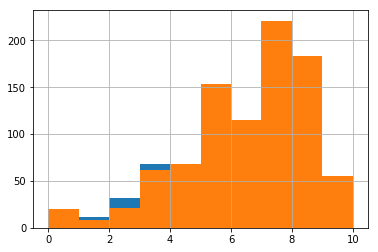

CZ
T-test=nan, p-value=nan
In CZ, people become less trusting from 2012 to 2014(reject Null Hypothesis)


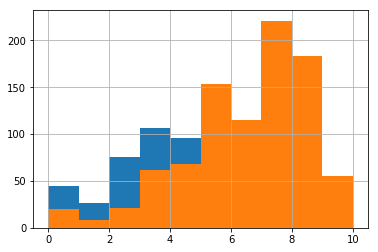

DE
T-test=0.0, p-value=0.5
In DE, people become equal or greater from 2012 to 2014 (fail to reject H0)


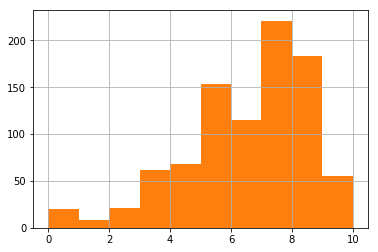

ES
T-test=0.0, p-value=0.5
In ES, people become equal or greater from 2012 to 2014 (fail to reject H0)


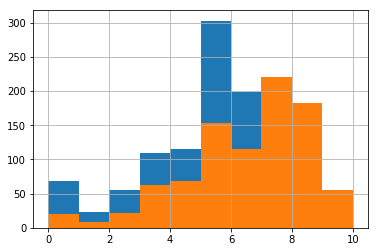

NO
T-test=nan, p-value=nan
In NO, people become less trusting from 2012 to 2014(reject Null Hypothesis)


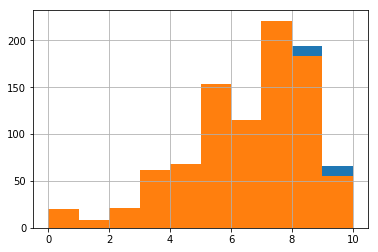

SE
T-test=nan, p-value=nan
In SE, people become less trusting from 2012 to 2014(reject Null Hypothesis)


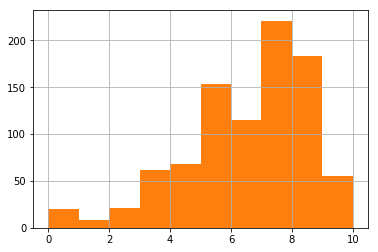

In [83]:
#Null Hypothesis: people become equal or greater trusting from 2012 to 2014
#Alternative hypothesis: people become less trusting from 2012 to 2014


for country in survey.cntry.unique():
    print(country)
    
    #calculating mean
    mean2012 = survey[(survey['year']==6) & (survey['cntry']==country)]['ppltrst'].mean()
    
    #Set data for the country
    data2014 = survey[(survey['year']==7) & (survey['cntry']==country)]['ppltrst']
    data2014 = survey[(survey['year']==6) & (survey['cntry']==country)]['ppltrst']
    

    #Comparing samples
    
    #z-test from Statsmodels package with alternate='smaller' 
    #as an argument to denote the one-tailed test.
    
    t, p = ztest(data2014, value = mean2012, alternative = "smaller")
    
    print('T-test={}, p-value={}'.format(t, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('In {}, people become equal or greater from 2012 to 2014 (fail to reject H0)'.format(country))
    else:
        print('In {}, people become less trusting from 2012 to 2014(reject Null Hypothesis)'.format(country))
        
    data2014.hist()
    data2012.hist()

    plt.show()

In [46]:
#This exercise just compare both years and conclude if results from both years are significally different
# H0 : data2012 = data2014
# Ha : data2012 != data2014


for country in survey.cntry.unique():
    print(country)
    
    #Set data for each country
    data2012 = survey[(survey['year']==6) & (survey['cntry']==country)]['ppltrst']
    data2014 = survey[(survey['year']==7) & (survey['cntry']==country)]['ppltrst']

    #Comparing samples
    
    #T test for independent samples
    #stat, p = stats.ttest_ind(data2012, data2014)
    
    #ttest_rel for dependent samples
    stat, p = stats.ttest_rel(data2012,data2014)
    print('Statistics={}, p={}'.format(stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject Null Hypothesis)')
        

CH
Statistics=-0.6586851756725737, p=0.5102943511301135
Same distributions (fail to reject H0)
CZ
Statistics=nan, p=nan
Different distributions (reject Null Hypothesis)
DE
Statistics=-0.18399501804849683, p=0.8568563797095805
Same distributions (fail to reject H0)
ES
Statistics=nan, p=nan
Different distributions (reject Null Hypothesis)
NO
Statistics=nan, p=nan
Different distributions (reject Null Hypothesis)
SE
Statistics=nan, p=nan
Different distributions (reject Null Hypothesis)


### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

CH
T-test=nan, p-value=nan
In CH, people become happier from 2012 to 2014(reject Null Hypothesis)


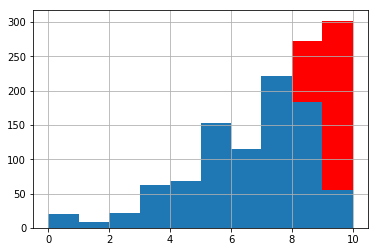

CZ
T-test=nan, p-value=nan
In CZ, people become happier from 2012 to 2014(reject Null Hypothesis)


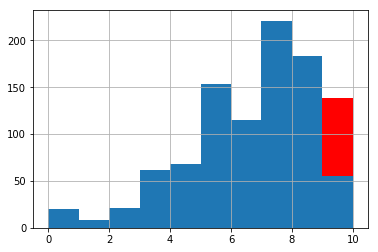

DE
T-test=0.0, p-value=0.5
In DE, people become equal or less happy from 2012 to 2014 (fail to reject H0)


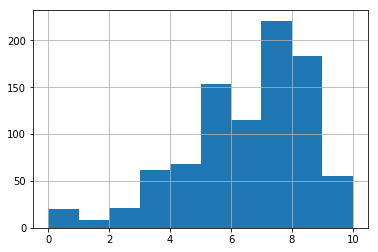

ES
T-test=nan, p-value=nan
In ES, people become happier from 2012 to 2014(reject Null Hypothesis)


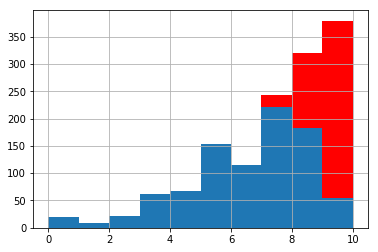

NO
T-test=nan, p-value=nan
In NO, people become happier from 2012 to 2014(reject Null Hypothesis)


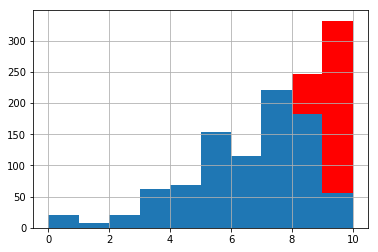

SE
T-test=nan, p-value=nan
In SE, people become happier from 2012 to 2014(reject Null Hypothesis)


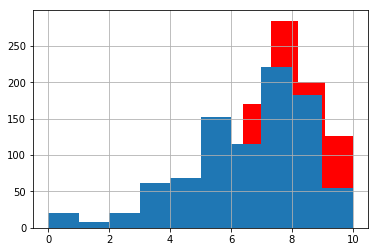

In [88]:
#Null Hypothesis: people become equal or less happy from 2012 to 2014
#Alternative hypothesis: people become happier from 2012 to 2014


for country in survey.cntry.unique():
    print(country)
    
    #calculating mean
    mean2012 = survey[(survey['year']==6) & (survey['cntry']==country)]['happy'].mean()
    
    #Set data for the country
    data2014 = survey[(survey['year']==7) & (survey['cntry']==country)]['happy']
    data2014 = survey[(survey['year']==6) & (survey['cntry']==country)]['happy']
    

    #Comparing samples
    
    #z-test from Statsmodels package with alternate='smaller' 
    #as an argument to denote the one-tailed test.
    
    t, p = ztest(data2014, value = mean2012, alternative = "larger")
    
    print('T-test={}, p-value={}'.format(t, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('In {}, people become equal or less happy from 2012 to 2014 (fail to reject H0)'.format(country))
    else:
        print('In {}, people become happier from 2012 to 2014(reject Null Hypothesis)'.format(country))
        
    data2014.hist(color='red')
    data2012.hist()

    plt.show()

### Who reported watching more TV in 2012, men or women?

T-test=nan, p-value=nan
Women watched more TV in 2012 than men did


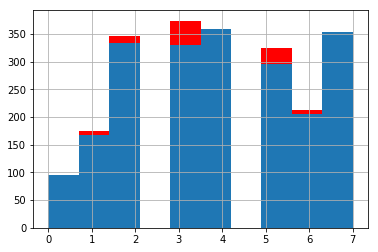

In [101]:
#Null Hypothesis: Men watched TV in 2012 equally or greater than women did
#Alternative hypothesis: Men watched TV in 2012 less than women did


#Set data for the country
datamenwatchTV2012 = survey[(survey['year']==6) & (survey['gndr']==1)]['tvtot']
datawomenwatchTV2012 = survey[(survey['year']==6) & (survey['gndr']==2)]['tvtot']


#Comparing samples
    
#z-test from Statsmodels package with alternate='smaller' 
#as an argument to denote the one-tailed test.

t, p = ztest(datamenwatchTV2012, value = datawomenwatchTV2012.mean(), alternative = "larger")

print('T-test={}, p-value={}'.format(t, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Men watched TV in 2012 equally or greater than women did')
else:
    print('Women watched more TV in 2012 than men did')

    
datamenwatchTV2012.hist(color='red')
datawomenwatchTV2012.hist()

plt.show()

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [98]:
survey[(survey['year']==6) & (survey['partner']==2) & (survey['pplfair']>=5.5)]['pplfair'].mean()

7.3921139101861995

T-test=1.349155245652561, p-value=0.9113564467818072
People living alone believe that people were fair in 2012 


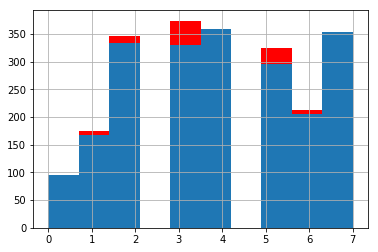

In [102]:
#Null Hypothesis: People living with a partner believe that people were fair in 2012 equal or more than people living alone
#Alternative hypothesis: People living with a partner believe that people were fair in 2012 less than people living alone

# 1 - Lives with husband/wife/partner at household grid
# 2 - Does not

#All rounds: Using this card, do you think that most people would try to take advantage 
#of you if they got the chance, or would they try to be fair?



#calculating mean
#womenwatchTV2012mean = survey[(survey['year']==6) & (survey['gndr']==2)]['tvtot'].mean()

#Set data for the country
sample1 = survey[(survey['year']==6) & (survey['partner']==1) & (survey['pplfair']>=5.5)]['pplfair']
sample2 = survey[(survey['year']==6) & (survey['partner']==2) & (survey['pplfair']>=5.5)]['pplfair']


#Comparing samples
#z-test from Statsmodels package with alternate='smaller' 
#as an argument to denote the one-tailed test.

t, p = ztest(sample1, value = sample2.mean(), alternative = "smaller")

print('T-test={}, p-value={}'.format(t, p))

# interpret
alpha = 0.05
if p > alpha:
    print('People living alone believe that people were fair in 2012 ')
else:
    print('People living with a partner believe that people were fair in 2012 (reject Null Hypothesis)')

    
datamenwatchTV2012.hist(color='red')
datawomenwatchTV2012.hist()

plt.show()